# Introduction to scikit lear(sklearn)

This notebook demonstrates some of the most useful functions of the Scikit-Learn library

What are we going to cover:

0. An end-to-end scikit learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve the model
6. Save and load a trained model
7. Putting it all together

In [2]:
#Lets listfy the contents

what_were_covering = [
    "0. An end-to-end scikit learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve the model",
    "6. Save and load a trained model",
    "7. Putting it all together"]

## 0. An end-to-end Scikit -Learn Workflow

In [3]:
# 1.Get the data ready
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Create x (feature matrix)
x = heart_disease.drop("target",axis=1)

#Create y(labels)
y = heart_disease["target"]

In [5]:
#2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#We'll keep the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3.Fit the model to training data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

In [7]:
clf.fit(x_train,y_train);

In [8]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3


In [9]:
#Make a prediction
# Error y_label = clf.predict(np.array([0,2,3,4]))

In [10]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0])

In [11]:
y_test


293    0
68     1
43     1
151    1
40     1
      ..
112    1
168    0
223    0
2      1
246    0
Name: target, Length: 61, dtype: int64

In [12]:
# 4 . Evaluate the model on the training and test data
clf.score(x_train,y_train)

1.0

In [13]:
clf.score(x_test,y_test)

0.7704918032786885

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        27
           1       0.76      0.85      0.81        34

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [16]:
confusion_matrix(y_test,y_preds)

array([[18,  9],
       [ 5, 29]])

In [17]:
accuracy_score(y_test,y_preds)

0.7704918032786885

In [18]:
# 5.Improve a Model
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test) * 100:2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 72.131148%

Trying model with 20 estimators...
Model accuracy on test set: 78.688525%

Trying model with 30 estimators...
Model accuracy on test set: 75.409836%

Trying model with 40 estimators...
Model accuracy on test set: 75.409836%

Trying model with 50 estimators...
Model accuracy on test set: 78.688525%

Trying model with 60 estimators...
Model accuracy on test set: 77.049180%

Trying model with 70 estimators...
Model accuracy on test set: 73.770492%

Trying model with 80 estimators...
Model accuracy on test set: 77.049180%

Trying model with 90 estimators...
Model accuracy on test set: 80.327869%



In [19]:
# 6.Save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [20]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

0.8032786885245902

## Getting our data ready to use with machine learning

Three main things we have to dd:
    1. Split the data into features and labels(usually 'x' & 'y')
    2. Filling (also called imputing ) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
x = heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
x.shape[0]* 0.8

242.4

In [27]:
len(heart_disease)

303

### 1.1 Make sure its all numerical

In [28]:
car_sales = pd.read_csv("data/car-sales-extended.csv")

In [29]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
# Split the data x/y
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

#Split into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [33]:
#Build machine learning model
# Error
'''from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)'''

'from sklearn.ensemble import RandomForestRegressor \n\nmodel = RandomForestRegressor()\nmodel.fit(x_train,y_train)\nmodel.score(x_test,y_test)'

In [34]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [36]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [37]:
# Lets refit the model
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,
                                                 y,test_size=0.2)
model = RandomForestRegressor()                 
model.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
model.score(x_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?
1. Fill them with value (also known as imputation).
2. Remove the samples with missing data altogether

In [39]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [40]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# Create x & y
x = car_sales_missing.drop("Price",axis=1)
y =car_sales_missing["Price"]

In [43]:
#Lets try and convert data to numbers
# Turn the categories into numbers
# Error
'''
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x'''

'\ncategorical_features = ["Make","Colour","Doors"]\none_hot = OneHotEncoder()\ntransformer = ColumnTransformer([("one_hot",\n                                one_hot,\n                                categorical_features)],\n                               remainder="passthrough")\ntransformed_x = transformer.fit_transform(x)\ntransformed_x'

In [44]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option1.Fill missing data with Pandas 

In [45]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [46]:
# Fill the "Make" Column
car_sales_missing["Make"].fillna("missing",inplace=True)

#Fill the "colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

#Fill the "Odometer" Column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

#Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [47]:
#Check our dataframe
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
# Remove the rows with missing Price values
car_sales_missing.dropna(inplace=True)

In [49]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [50]:
len(car_sales_missing)

950

In [51]:
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [52]:
#Lets try and convert data to numbers
# Turn the categories into numbers

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2:Fill mmissing values with scikit learn

In [53]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [54]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [55]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [56]:
#Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [57]:
#Split into x & y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [58]:
# Fill missing values using sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_features)
])

#Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [59]:
car_sales_filled = pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [60]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [61]:
#Lets try and convert data to numbers
# Turn the categories into numbers

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [62]:
# Now we have got our data as numbers and filled (no missing values)
# Les fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(transformed_x,
                                                y,
                                                test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

In [63]:
len(car_sales_filled),len(car_sales)

(950, 1000)

In [64]:
what_were_covering

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm 

* Classification- predicting whther a sample is one thing or another 
* Regression - predicting a number

* *Step 1 - Check the Scikit-Learn Ml Map

### 2.1 Picking a ML model for our regression problem

In [65]:
# import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [66]:
boston_df = pd.DataFrame(boston["data"],columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [67]:
# How many samples?
len(boston_df)

506

In [68]:
# Lets try the ridge regression model
from sklearn.linear_model import Ridge
 
#Steup random seed
np.random.seed(42)

#Create the data
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

#Split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate Ridge Model
model = Ridge()
model.fit(x_train,y_train)

#Check the score of the Ridge model on test data
model.score(x_test,y_test)

0.6662221670168522

How do we improve this score?

What if Ridge wasn't working?

In [69]:
# Lets try the Random forest REgressor
from sklearn.ensemble import RandomForestRegressor

#Steup random seed
np.random.seed(42)

#Create the data
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

#Split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForest Model
reg = RandomForestRegressor()
reg.fit(x_train,y_train)

#Check the score of the RandomForest model on test data
reg.score(x_test,y_test)

0.8654448653350507

In [70]:
# Check the Ridge model again
model.score(x_test,y_test)

0.6662221670168522

### 2.2 Choosing an estimator for a classification problem


In [71]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try `LinearSVC`

In [72]:
# Import the LinearSVC model
from sklearn.svm import LinearSVC

#Setup random seed

np.random.seed(42)

#Make the data
x = heart_disease.drop("target",axis=1)
y= heart_disease["target"]

#Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(x_train,y_train)

#Evaluate the LinearSVC
clf.score(x_test,y_test)

/home/runal/Desktop/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [73]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [74]:
# Import the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
x = heart_disease.drop("target",axis=1)
y= heart_disease["target"]

#Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#Evaluate the RAndomDorestClassifier
clf.score(x_test,y_test)

0.8524590163934426

 Tidbit:
        1. If you have structured data,used ensemble methods
        
        2. If you have unstructured data, use deep learning transfer learning

In [75]:
what_were_covering

['0. An end-to-end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve the model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 3. Fit the model/algorithm on our data and use it to make prediction

### 3.1 Fitting the model to the data

Different names for:
* `x` = features.frature variables,data
* `y` = labels,target,target variables,ground_truth

In [76]:
# Import the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
x = heart_disease.drop("target",axis=1)
y= heart_disease["target"]

#Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(x_train,y_train)

#Evaluate the RAndomDorestClassifier (use the pattern the model has learned)
clf.score(x_test,y_test)

0.8524590163934426

In [77]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [78]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2  Make  predictionds using a machine learning  model

2 ways to make predictions:
1. `predict()`
2. `predict_probe()`

In [79]:
# Use a trained model to make predictions
# Error
#clf.predict(np.array([1,2,43,4,6,2])) # this doesnt work

In [80]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [81]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [82]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [83]:
# Compare predictions to true labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [84]:
clf.score(x_test,y_test)

0.8524590163934426

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make precictions with `predict_proba()`

In [86]:
# predict_proba() returns the probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [87]:
0.89+0.11,0.49+0.51

(1.0, 1.0)

In [88]:
#Lets Predict on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [89]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [90]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used on regression model too

In [91]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

#split into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate and fit model
model = RandomForestRegressor().fit(x_train,y_train)

#Make predictions
y_preds = model.predict(x_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [92]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [93]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.136382352941176

## 4. Evalluating a machine learning model

Three ways to evaluate scikit learn models/estimators:
1. Estimator `Score` Method
2. The `Scoring` parameter
3. Problem-specific metric functions.

### 4.1 Evaluating a model with the score method

In [94]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)


RandomForestClassifier()

In [95]:
clf.score(x_train,y_train)

1.0

In [96]:
clf.score(x_test,y_test)

0.8524590163934426

Lets do the same for regression

In [97]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

#split into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate and fit model
model = RandomForestRegressor().fit(x_train,y_train)

In [98]:
model.score(x_train,y_train)

0.9763520974033731

In [99]:
model.score(x_test,y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring` parameters

In [100]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train);


In [101]:
clf.score(x_test,y_test)

0.8524590163934426

In [102]:
cross_val_score(clf,x,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [103]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [104]:
np.random.seed(42)

# Single training and test split score

clf_single_score = clf.score(x_test,y_test)

# Take the mean of 5-fold cross_validation score

clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

#Compare the two 
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [105]:
# Default scoring parameter of classifier = mean accuracy
#clf.score()

In [106]:
# Scoring parameter set to none  by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,x,y,cv=5)

In [108]:
np.mean(cross_val_score)

0.8248087431693989

In [109]:
print(f"Heart Disease Classifier Cross-Validated Accuracy:{np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy:82.48%


**Area under the Receiver Operating Characteristic curve (AUC/ROC)**

* Area Under Curve (AUC)
* ROC Curve

ROC curves are a comparison of a models true positive rate(tpr) versus a models false positive(fpr)

* True Positive = model predicts  1 when truth is 1.
* False Positive = model predicts 1 when truth is 0.
* True Negative = model predicts 0 when truth is 0.
* False Negative = model predicts 0 when truth is 1.

In [110]:
# Create x_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [111]:
from sklearn.metrics import roc_curve
 
# Fit the classifier
clf.fit(x_train,y_train)
    
# Make precdictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10],len(y_probs)


(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [112]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [113]:
# Calculate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

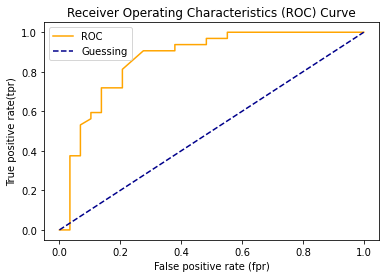

In [114]:
# Create a function for plotting ROC Curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC Curve giiven the false positive(fpr)
    and true positive rate (tpr) of a model
    """
    
    #plot roc curve
    plt.plot(fpr,tpr,color = "orange",label="ROC")
    
    #plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
             
             #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
             
plot_roc_curve(fpr,tpr)

In [115]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

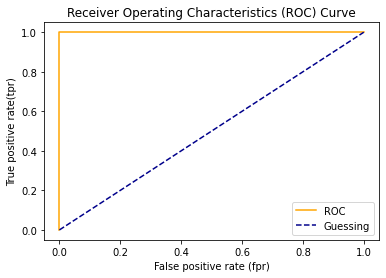

In [116]:
# plot perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [117]:
#Perfect AUC Score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A Confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence,giving you an idea of where the model is getting confused.

In [118]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [119]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [120]:
22+26+6+6

60

In [121]:
len(x_test)

61

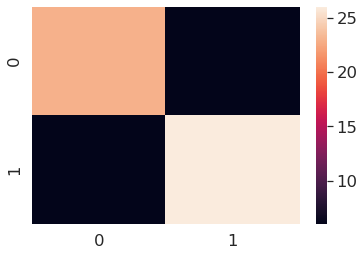

In [122]:
# Make our confusion matrix more visual with Seaborn's Heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

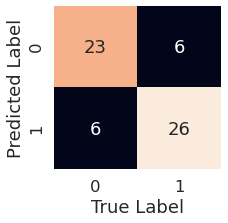

In [123]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, #Annotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");

plot_conf_mat(conf_mat)

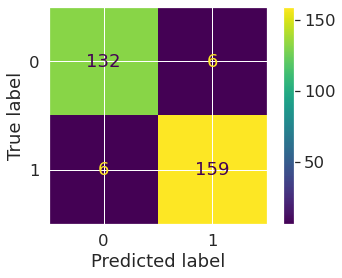

In [124]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,x,y)

**Classification Report**

In [125]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [126]:
# Where precision and recall become valuable 
disease_true = np.zeros(10000)

disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

/home/runal/Desktop/sample_project/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* **Accuracy**:Its a good measure to start if all classes are balanced (e.g. Some amoount of samples which are labelled with 0 or 1)
* **Precision** and **recall** becomme more important when classes are imbalanced.
* If false positive predictionks are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives , aim for higher recall.
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

1. R^2 (pronounced r-square) or coefficient of determination.
2. Mean absolute error(MAE)
3. Mean squared error(MSE)

**R^2**

* What R-squared does: Compares your models predictions to the mean of the targets.Values can range from negative infinity (a very poor model)to 1.For ex, if all your model does is predicts the mean of the targets, its R^2 value would br 0.And if your model predicts perfectly a range of numbers its R^2 value would be 1.

In [127]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)


RandomForestRegressor()

In [128]:
model.score(x_test,y_test)

0.8654448653350507

In [129]:
from sklearn.metrics import r2_score

# Fill in array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [130]:
y_test.mean()

21.488235294117644

In [131]:
r2_score(y_test,y_test_mean)

0.0

In [132]:
r2_score(y_test,y_test)

1.0

**Mean  Absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.It gives an idea  of how wrong your models predictions are.

In [133]:
# Mean Aboslute Error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [134]:
df = pd.DataFrame(data={"actual values":y_test,
                       "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared Error (MSE)**

In [135]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [136]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.867437068627442

### 4.23 Finally using the `scoring` parameter

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


In [138]:
np.random.seed(42)

cv_acc = cross_val_score(clf,x,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [139]:
# Cross Validated Accuracy 

print(f"The cross-validated Accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated Accuracy is:82.48%


In [140]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")

print(f"The cross-validated Accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated Accuracy is:82.48%


In [141]:
# Precision
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")

np.mean(cv_precision)

0.8085601538512754

In [142]:
# REcall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [143]:
#F1
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.841476533416832

How about our Regression model

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target",axis=1)
y = boston_df["target"]

model = RandomForestRegressor()


In [145]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=5,scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [146]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=5,scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [147]:
# Mean Absolute Error
cv_mae = cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [148]:
# Mean squared Error
cv_mse = cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.12863512415064

### 4.3 Using different evaluation metrics as Scikit Learn Functions

**Classification evaluation functions**

In [149]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn .model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)

# Make some predictions
y_preds = clf.predict(x_test)

# Evaluate the classifiers
print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_preds)}")
print(f"recall:{recall_score(y_test,y_preds)}")
print(f"F1:{f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy:85.25%
Precision:0.8484848484848485
recall:0.875
F1:0.8615384615384615


**Regression evaluation Functions**

In [150]:
from sklearn .metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

# Make predictions using our regressor model
y_preds = model.predict(x_test)

#Evaluate the regressor model
print("REgression model metrics on the set ")
r2_score(y_test,y_preds),mean_absolute_error(y_test,y_preds),mean_squared_error(y_test,y_preds)


REgression model metrics on the set 


(0.8654448653350507, 2.136382352941176, 9.867437068627442)

## 5 . Improving a model

First Predictions = baseline predictions.
First model = Baseline model.

From a data perspective :
* Could we collect more data?(generally ,the more the data, the better)
* Could we improve our data?

From a model perspective : 
* Is there a better model we could use?
* Could we improve the current model?

Parameters vs. HyperParameters
* Parameters  = model find these patterns in data
* HyperParameters  = settings on a model you can adjust to(Potentially) improves its ability to  find patterns

Three ways to adjust hyperparameters:
1. By hand
2. RAndomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [151]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [152]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning HyperParameter by Hand

Lets make 3 sets training, validation and test

WE're going to try and adjust :
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [153]:
def evaluate_preds(y_true,y_preds):
    '''
    Performs evaluation comparison on y_true labels vs. y_preds labels  on a classification .
    '''
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy":round(accuracy,2),
                  "precision": round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"Acc:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [154]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffle = heart_disease.sample(frac=1)

# Split into x & y
x = heart_disease_shuffle.drop("target",axis=1)
y = heart_disease_shuffle["target"]

# Split the data into validation and test sets
train_split = round(0.7 * len(heart_disease_shuffle)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffle))

x_train,y_train = x[:train_split],y[:train_split]
x_valid,y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test = x[valid_split:],y[valid_split:]

clf = RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)

# Make baseline predictions
y_preds = clf.predict(x_valid)

# Eavaluate classifie r on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc:80.00%
Precision:0.77
Recall: 0.92
F1 score: 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [155]:
np.random.seed(42)

#Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators = 100)
clf_2.fit(x_train,y_train)

# Make predictions with diff hyperparameters
y_preds2 = clf_2.predict(x_valid)

#Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid,y_preds2)

Acc:82.22%
Precision:0.84
Recall: 0.84
F1 score: 0.84


In [156]:
clf_3 = RandomForestClassifier(max_depth = 10)
clf_3.fit(x_train,y_train)

# Make predictions with diff hyperparameters
y_preds3 = clf_3.predict(x_valid)

#Evaluate the 2nd classifier
clf_3_metrics = evaluate_preds(y_valid,y_preds3)

Acc:82.22%
Precision:0.81
Recall: 0.88
F1 score: 0.85


### 5.2 Hyperparameter tuning RAndomizedSearchCV

In [157]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#Split inton x & y
x = heart_disease_shuffle.drop("target" ,axis=1)
y = heart_disease_shuffle["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate RAndomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

#Setup RAndomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,# numbers of models to try
                            cv=5,
                            verbose=2)

# Fit the RAndomizedSearchCV Version of clf
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.0s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.2s finished


In [158]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [159]:
# Make predicitons with the best hyperparameters

rs_y_preds = rs_clf.predict(x_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc:81.97%
Precision:0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV


In [160]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [161]:
6*5*2*3*3*5

2700

In [162]:
grid_2 = {'n_estimators': [ 100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [163]:
3*1*2*1*2*5

60

In [166]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

#Split inton x & y
x = heart_disease_shuffle.drop("target" ,axis=1)
y = heart_disease_shuffle["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate RAndomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

# Fit the GridSearchCV Version of clf
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   44.8s finished


In [167]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [168]:
gs_y_preds = gs_clf.predict(x_test)

#Evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc:78.69%
Precision:0.74
Recall: 0.82
F1 score: 0.78


Lets compare our diffrent models metrics

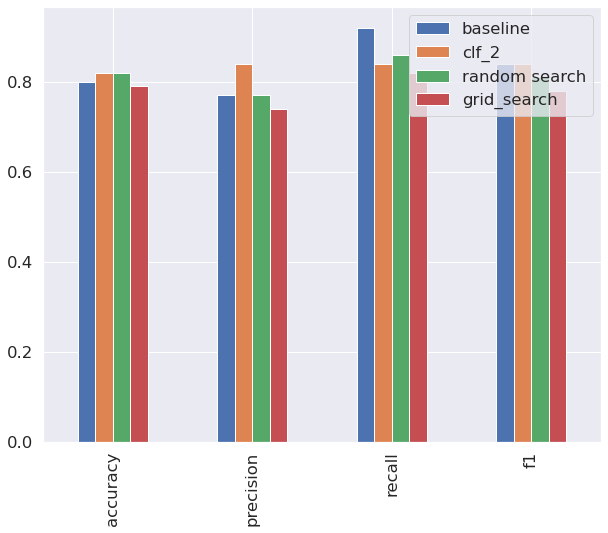

In [169]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                            "clf_2": clf_2_metrics,
                              "random search":rs_metrics,
                              "grid_search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

## 6.Saving and loading trained machine learning models

Two ways to save load machine learning models:
1. With Pythons `pickle` module.
2. With `joblib` module.

**Pickle**

In [170]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open("gs_randomfrstmdl.pkl","wb"))

In [171]:
# Load a saved model
loaded_pickle = pickle.load(open("gs_randomfrstmdl.pkl","rb"))

In [172]:
# Make some predictions
pickle_y_preds = loaded_pickle.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

Acc:78.69%
Precision:0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [173]:
from joblib import dump,load

# Save model to file
dump(gs_clf,filename="gs_randomfrstmdl.joblib")

['gs_randomfrstmdl.joblib']

In [174]:
# Import a saved joblib model
loaded_joblib = load(filename="gs_randomfrstmdl.joblib")

In [175]:
# Make some predictions
joblib_y_preds = loaded_joblib.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

Acc:78.69%
Precision:0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7.Putting it all together!


In [176]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [177]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [178]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do:
1. Fill missing data
2. Convert data to numbers
3. Build a model on this data

In [179]:
# Getting data ready
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split

#Setup random seed
import numpy as np
np.random.seed(42)

#import data and drop rows with missing label
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define different features and  transformer pipelines
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))])

#Setup the preprocessing steps(fill missing values then convert to numbers)
preprocessor = ColumnTransformer(
                transformers=[
                    ("cat",categorical_transformer,categorical_features),
                    ("door",door_transformer,door_feature),
                    ("num",numeric_transformer,numeric_features)
                ])

#Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestRegressor())])

#Split data
x = data.drop("Price",axis=1)
y = data["Price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875